In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Mors as mors
import os
import pickle
from scipy.interpolate import interp1d
import nbimporter
import Functions as fun

In [3]:
ages = np.linspace(50,5000,10000)
data = pd.read_csv('updated.csv')
masses,chz = data['Mass'],data['CHZ']
efficiency = 0.3

In [4]:
small_masses = np.array([0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
big_masses = np.array([2,3,5,10,25,50,75,100])
giant_masses = np.array([130,140,150,160,170,180,190,200,300,400])

rocky_radii = fun.findRadRocky(small_masses)
gas_radii = fun.findRadGas(big_masses)
giant_radii = fun.findRadGiant(giant_masses)

stars25=[]
stars50=[]
stars75=[]
stars95=[]

for i,star in enumerate(sorted(os.listdir('rp25'))):
    file_path = os.path.join('rp25', star)
    stars25.append(mors.Load(file_path))

for i,star in enumerate(sorted(os.listdir('rp50'))):
    file_path = os.path.join('rp50', star)
    stars50.append(mors.Load(file_path))

for i,star in enumerate(sorted(os.listdir('rp75'))):
    file_path = os.path.join('rp75', star)
    stars75.append(mors.Load(file_path))

for i,star in enumerate(sorted(os.listdir('rp95'))):
    file_path = os.path.join('rp95', star)
    stars95.append(mors.Load(file_path))


stars = [stars25,stars50,stars75,stars95]

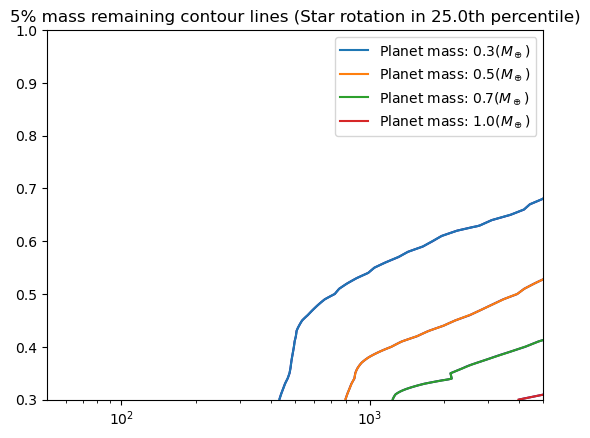

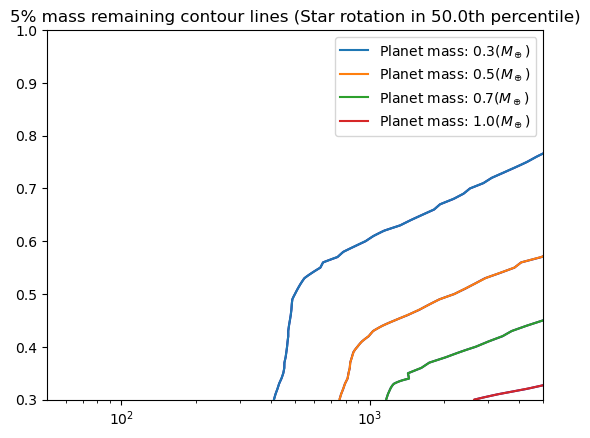

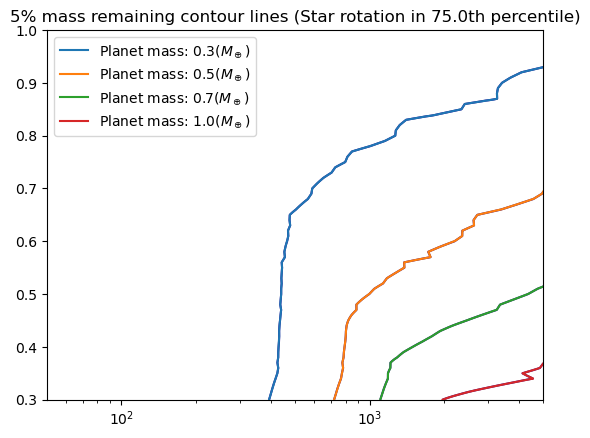

In [24]:
#look at how the contour line at level 1 (50% rotator) changes as planet mass changes
for star_group in stars:
    plt.figure()
    plt.title(f'5% mass remaining contour lines (Star rotation in {star_group[0].percentile}th percentile)')
    for (m,r) in zip(planet_masses,planet_radii):
        ages_contour,masses_contour = fun.plotContours(ages,star_group,efficiency,m,r,chz,R_atm=1.1,M_atm=5E-3, equations=True, levels=[5], algo='mpl2014')
        
        for (x,y) in zip(ages_contour,masses_contour):
            plt.plot(x,y,label=f'Planet mass: {m}($M_\oplus$)')   
        plt.legend()
    

Functions.ipynb:23: UserWarning: No contour levels were found within the data range.
  ]


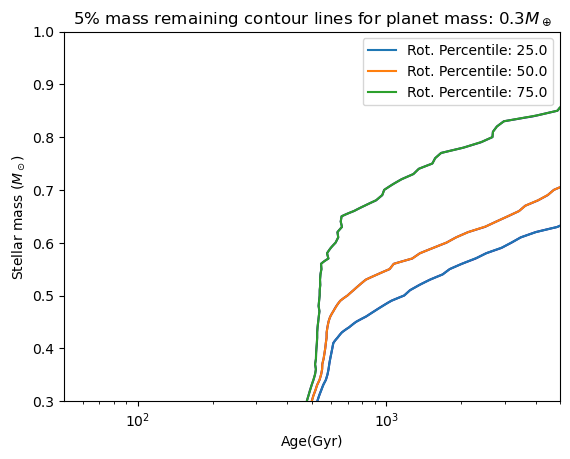

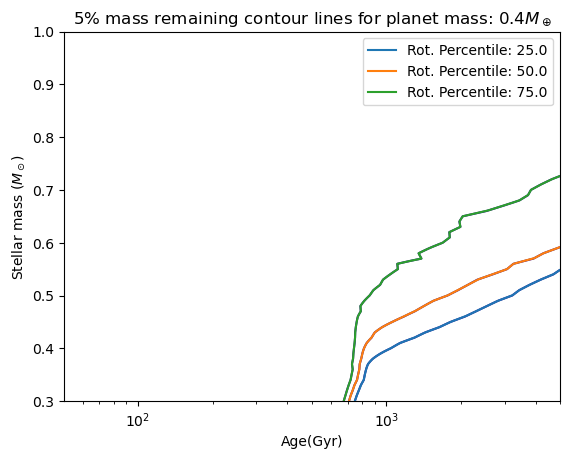

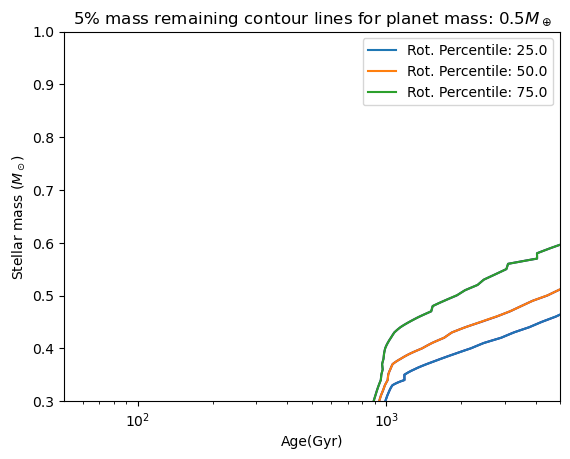

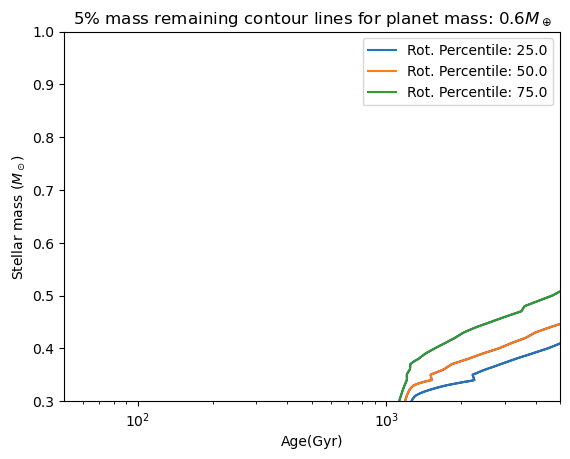

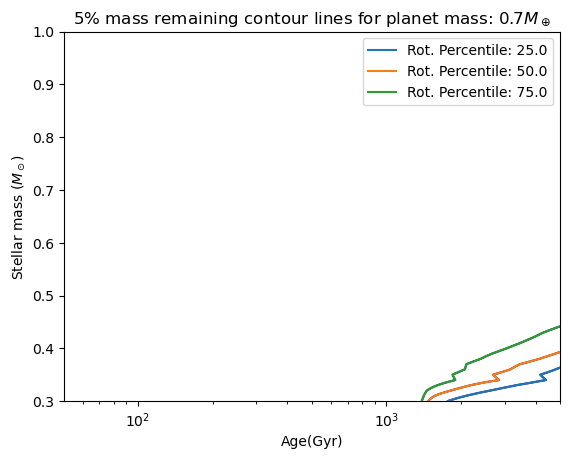

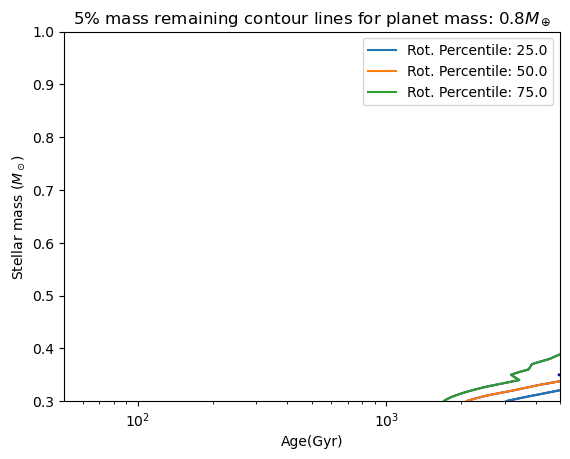

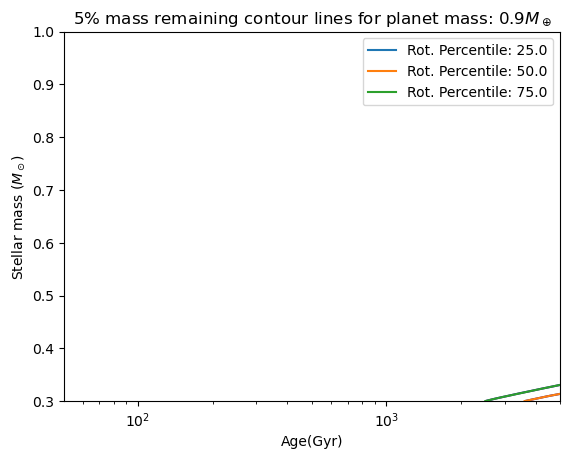

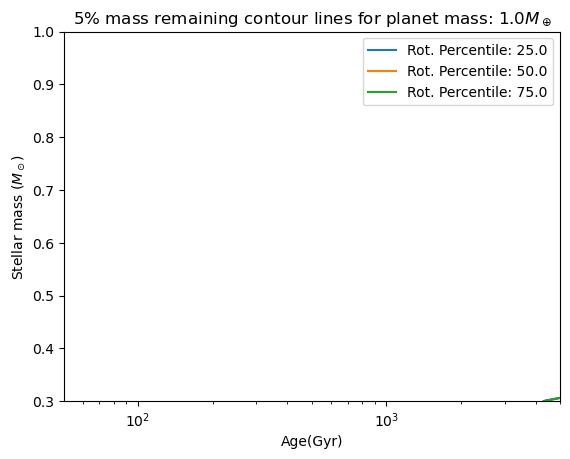

In [8]:
#look at how the contour line at level 5 changes as star rotation changes (different masses for each plot)
for (m,r) in zip(small_masses,rocky_radii):
    plt.figure()
    plt.title(f'5% mass remaining contour lines for planet mass: {m}$M_\oplus$')
    plt.xlabel('Age(Gyr)')
    plt.ylabel(f'Stellar mass ($M_\odot$)')
    for star_group in stars:
        ages_contour,masses_contour = fun.plotContours(ages,star_group,efficiency,m,r,chz,R_atm=1,M_atm=5E-3, equations=True, levels=[5], algo='mpl2014')
        
        for (x,y) in zip(ages_contour,masses_contour):
            plt.plot(x,y,label=f'Rot. Percentile: {star_group[0].percentile}')   
        plt.legend()
   

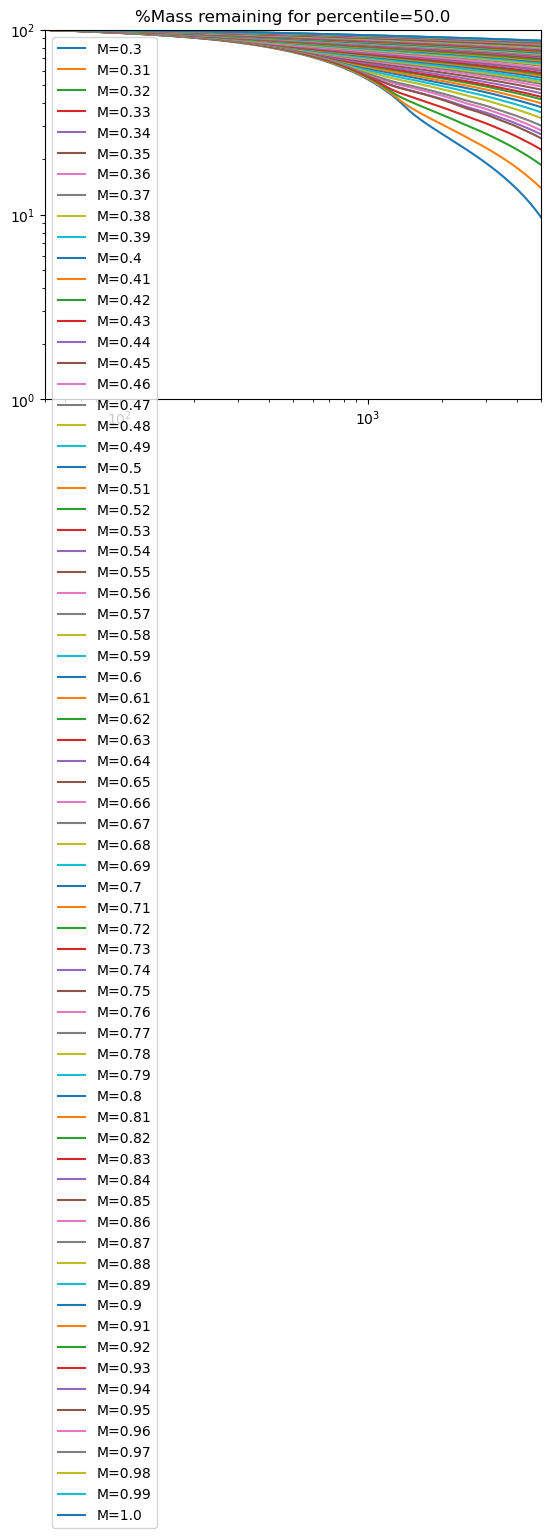

In [28]:
fun.plotByMass(ages, stars50, efficiency=0.3, Mpl=1, Rpl=1.03, chz=chz, R_atm=1, M_atm=5E-3,plotLxAndLeuv=False, plotMassRem=True, plotLxTrack=False, plotLeuvTrack=False, sepByMass=False)


In [4]:
#look at how the age at loss changes as a function of each variable
eff=0.3
ages=np.linspace(50,5000,10000)
for (m,r) in zip(planet_masses,planet_radii):
    plt.figure()#making a new figure here makes it so each plot is of a different mass, so I'll have a plot with m=# and the AAL given diff rot
    plt.title(f'Age at loss as function of stellar mass for different P_rot (planet mass: {m})')
    plt.xlabel('Stellar mass')
    plt.ylabel('Age at atmospheric loss (Myr)')
    plt.yscale('log')
    plt.xlim((0.25,1.25))
    plt.ylim((10,5000))
    for star_group in stars:
        x=masses #stellar masses on the x axis
        y=fun.ageAtLoss(ages,star_group,eff,m,r,chz,R_atm=1.1,M_atm=5E-3) #age at loss on y
        plt.plot(x,y,label=f'rotation percentile: {star_group[0].percentile}') #each line is associated with one stellar rotation percentile
    plt.legend()

NameError: name 'planet_masses' is not defined

Functions.ipynb:23: UserWarning: No contour levels were found within the data range.
  ]


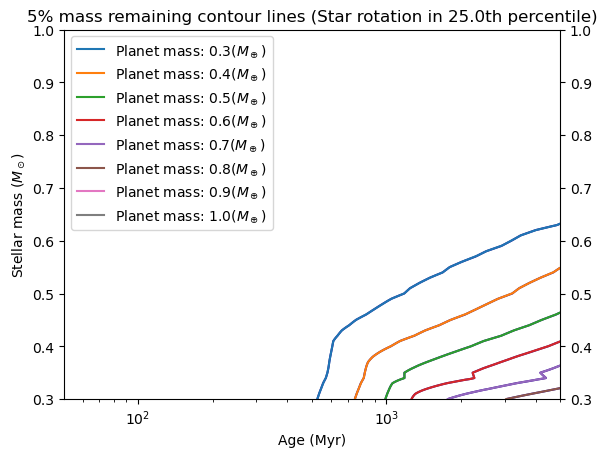

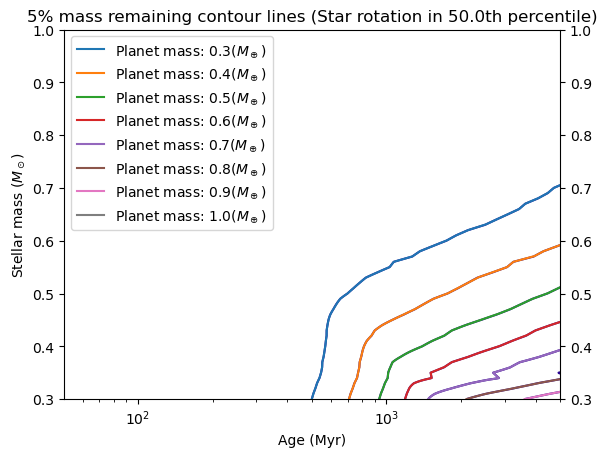

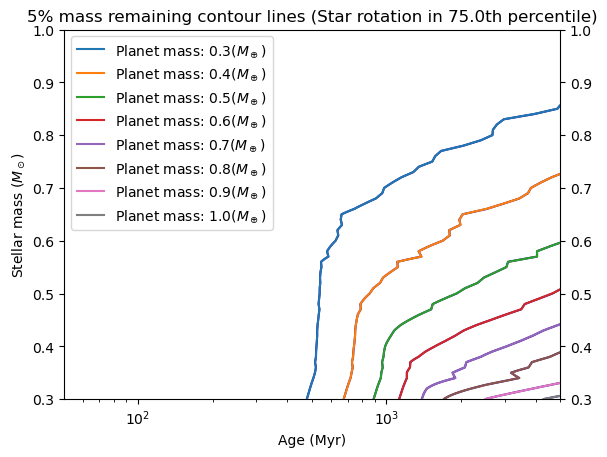

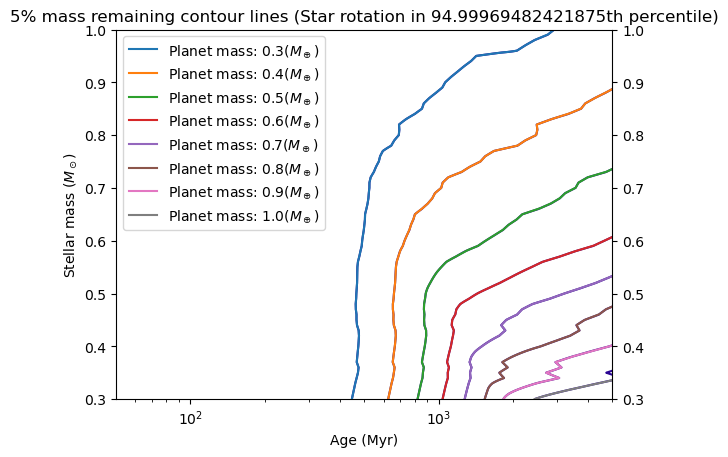

In [5]:
#plot all small masses with the small, rocky planets MR relation
#look at how the 5% contour line for different stellar rotation changes as planet mass changes
for star_group in stars:
    plt.figure()
    plt.title(f'5% mass remaining contour lines (Star rotation in {star_group[0].percentile}th percentile)')
    plt.xlabel('Age (Myr)')
    plt.ylabel(r'Stellar mass ($M_\odot$)')
    plt.tick_params(labelright=True,right=True)
    for (m,r) in zip(small_masses,rocky_radii):
        ages_contour,masses_contour = fun.plotContours(ages,star_group,efficiency,m,r,chz,R_atm=1,M_atm=5E-3, equations=True, levels=[5], algo='mpl2014')
        
        for (x,y) in zip(ages_contour,masses_contour):
            plt.plot(x,y,label=f'Planet mass: {m}($M_\oplus$)')
            
        plt.legend()
    

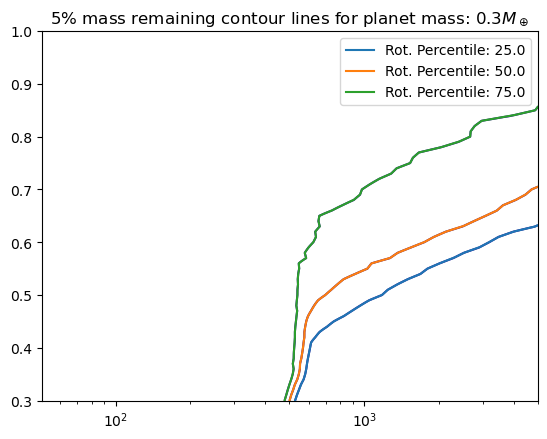

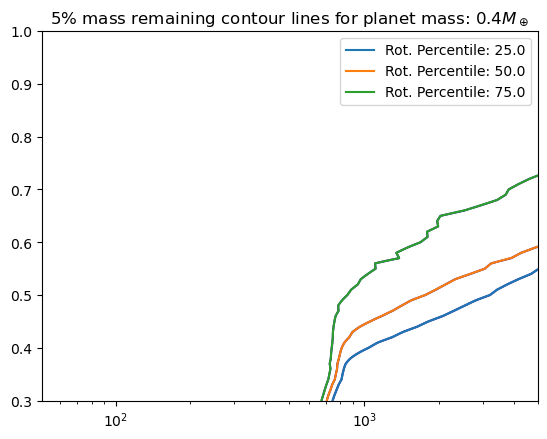

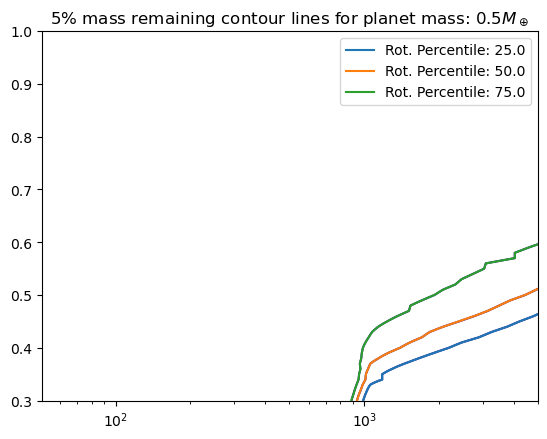

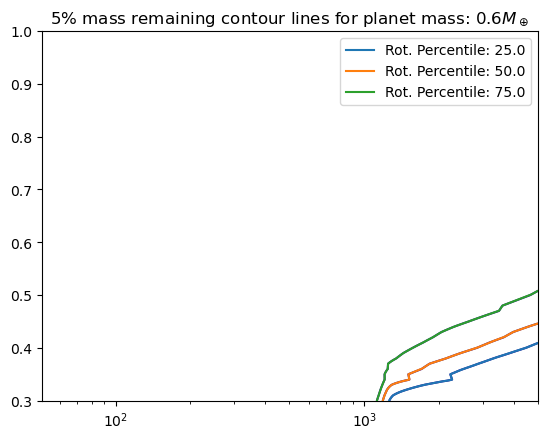

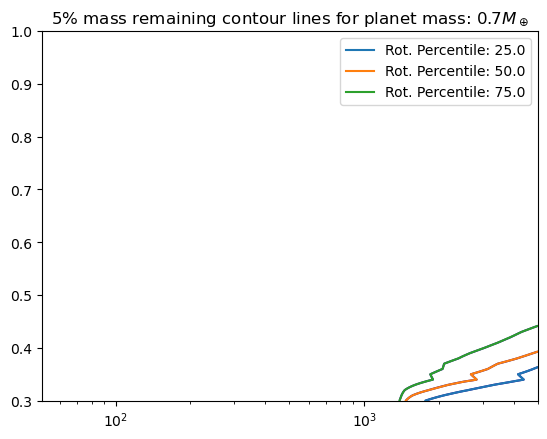

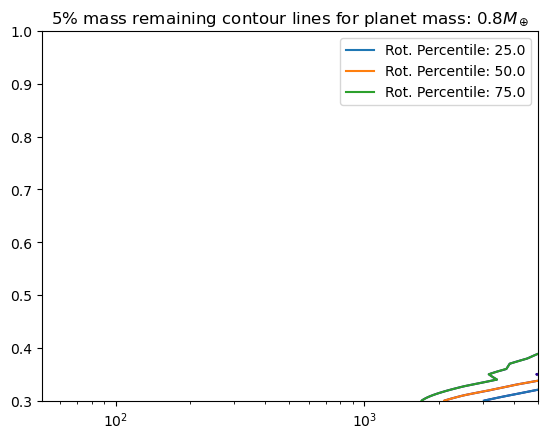

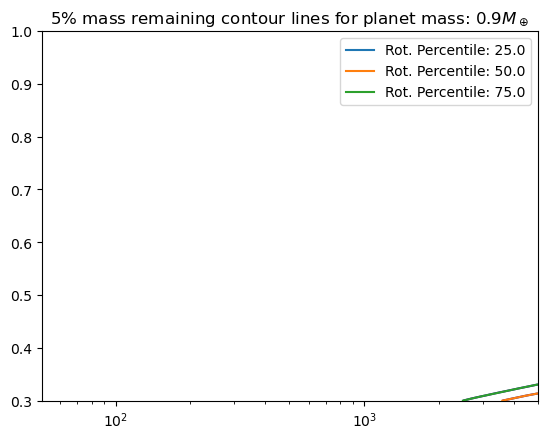

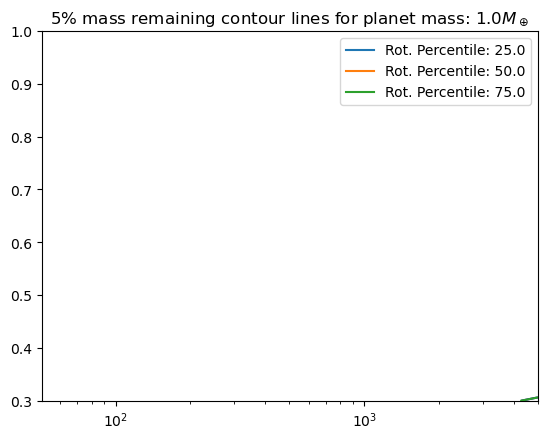

In [7]:
#plot all small masses with the small,rocky MR relation
#look at how the contour line at level 5 changes as star rotation changes for different planet masses
for (m,r) in zip(small_masses,rocky_radii):
    plt.figure()
    plt.title(f'5% mass remaining contour lines for planet mass: {m}$M_\oplus$')
    for star_group in stars:
        ages_contour,masses_contour = fun.plotContours(ages,star_group,efficiency,m,r,chz,R_atm=1,M_atm=5E-3, equations=True, levels=[5], algo='mpl2014')
        
        for (x,y) in zip(ages_contour,masses_contour):
            plt.plot(x,y,label=f'Rot. Percentile: {star_group[0].percentile}')   
        plt.legend()
   

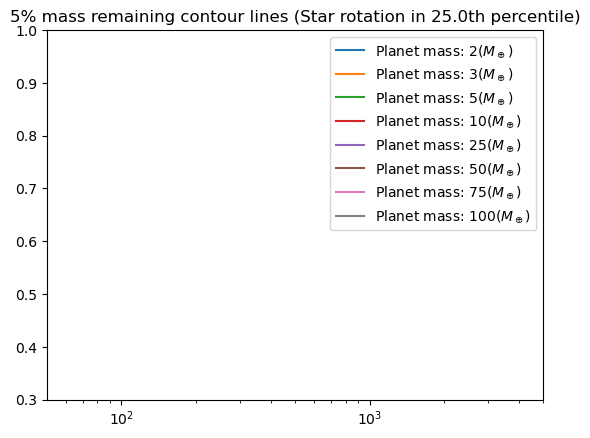

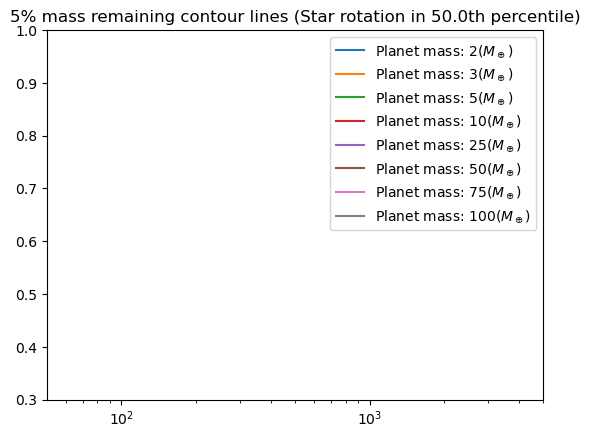

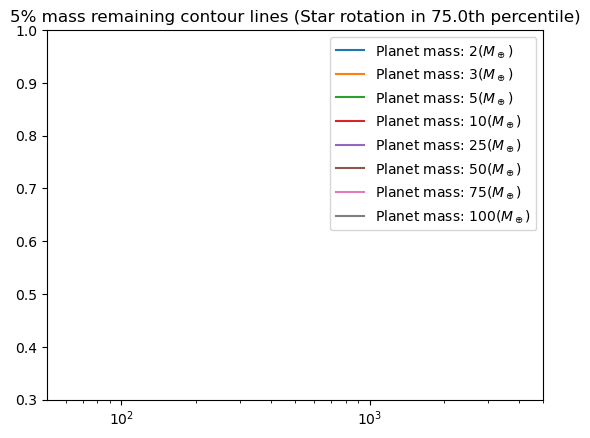

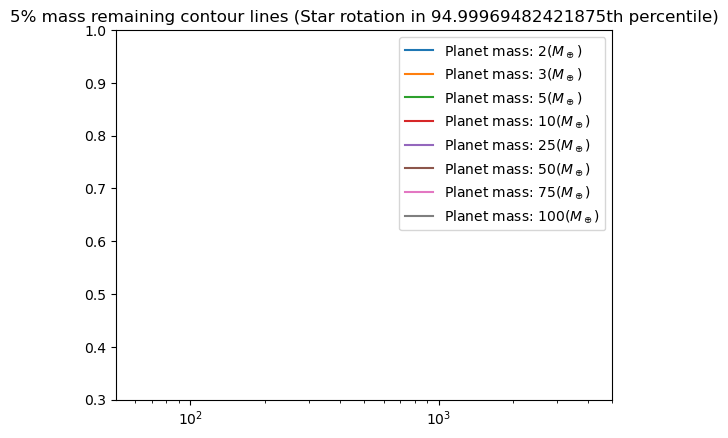

In [6]:
#plot all big masses with the smaller, gas planets MR relation
#look at how the 5% contour line for different stellar rotation changes as planet mass changes
for star_group in stars:
    plt.figure()
    plt.title(f'5% mass remaining contour lines (Star rotation in {star_group[0].percentile}th percentile)')
    for (m,r) in zip(big_masses,gas_radii):
        ages_contour,masses_contour = fun.plotContours(ages,star_group,efficiency,m,r,chz,R_atm=1,M_atm=5E-3, equations=True, levels=[5], algo='mpl2014')
        
        for (x,y) in zip(ages_contour,masses_contour):
            plt.plot(x,y,label=f'Planet mass: {m}($M_\oplus$)')   
        plt.legend()

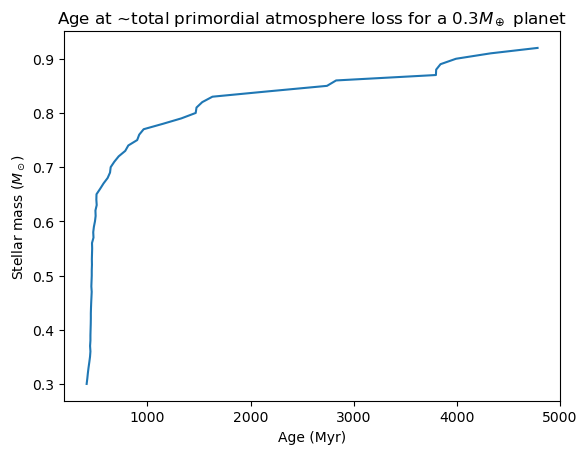

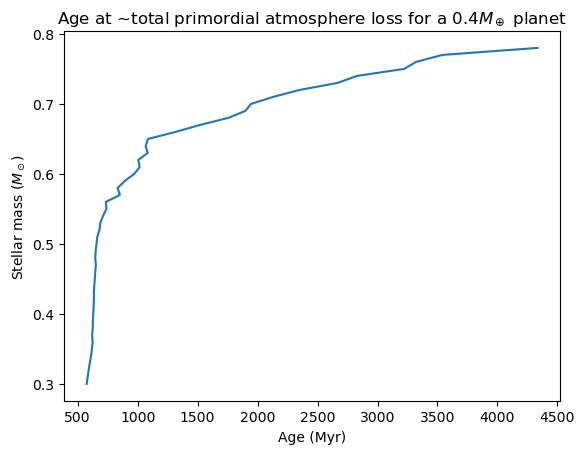

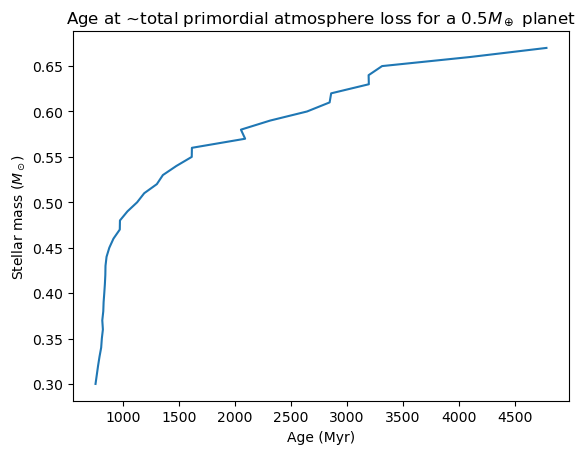

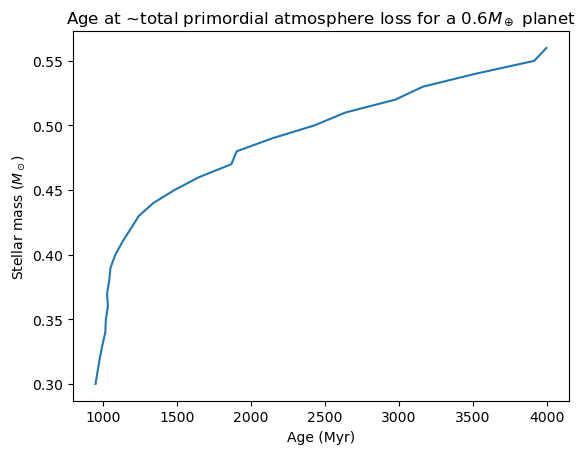

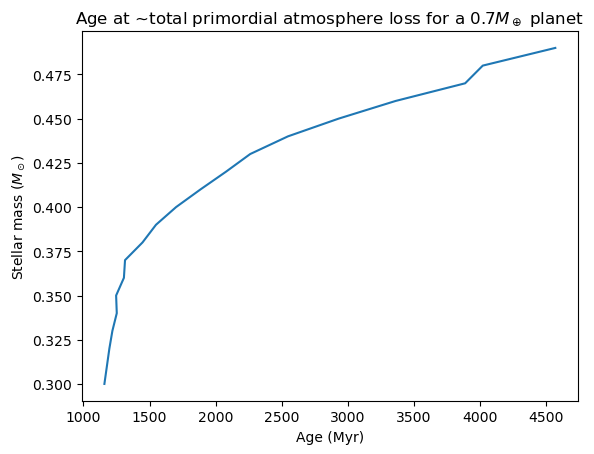

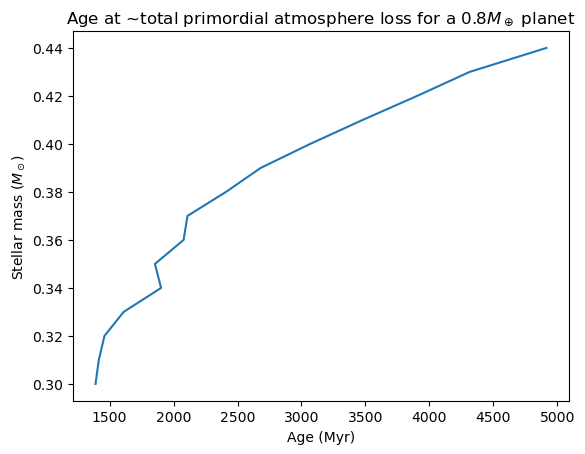

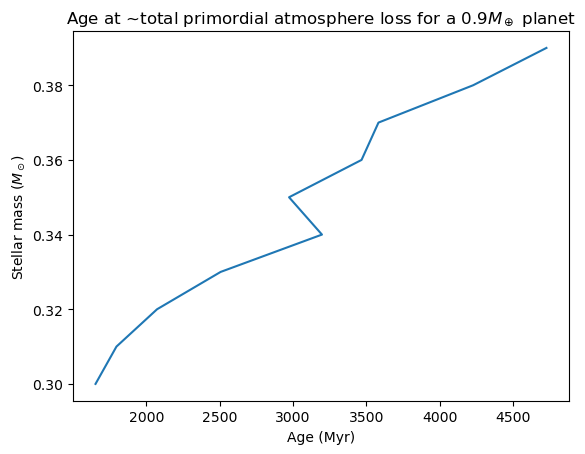

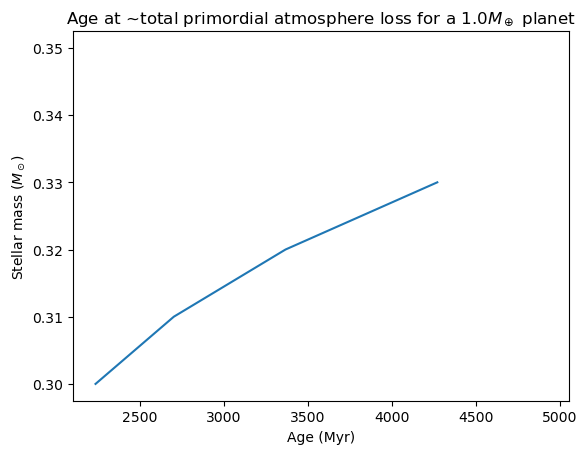

In [10]:
star_masses = np.arange(0.3,1.01,0.01)
for (mass,rad) in zip(small_masses,rocky_radii):
    age_loss=fun.ageAtLoss(ages,stars75,0.3,mass,rad,chz)
    plt.figure()
    plt.title(rf'Age at ~total primordial atmosphere loss for a ${np.round(mass,2)}M_\oplus$ planet')
    plt.ylabel(r'Stellar mass ($M_\odot$)')
    plt.xlabel('Age (Myr)')
    plt.plot(age_loss,star_masses)

In [7]:
#plot the age at near-total loss
fun.ageAtLoss?


Signature: fun.ageAtLoss(ages, stars, eff, Mpl, Rpl, chz, R_atm=1.1, M_atm=0.005)
Docstring:
ages: 1D array of ages of the stars in Myr
stars: 1D array of Mors star objects
eff: efficiency
Mpl: mass of planet in earth masses
Rpl: radius of planet in earth radii
chz: 1D array of continuous habitable zones
R_atm: radius of the atmosphere, default 1.1
M_atm: mass of the atmospehre, default 5E-3
File:      ~/LeidenResearch1/Refined/Functions.ipynb
Type:      function


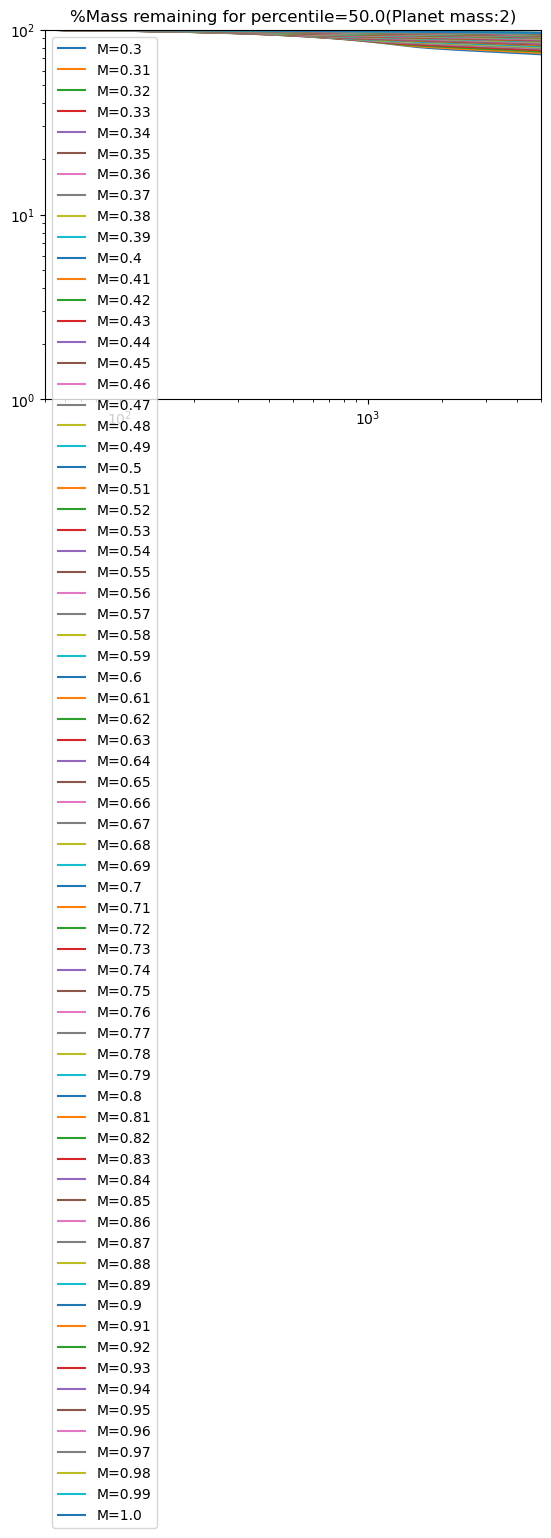

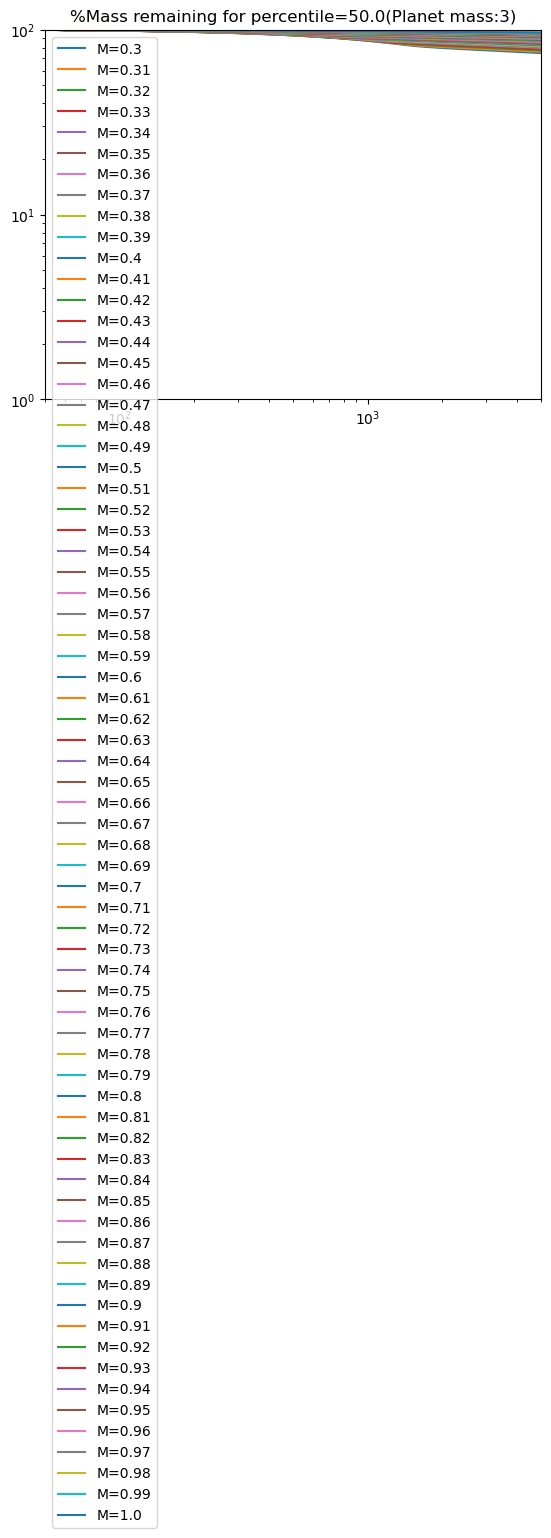

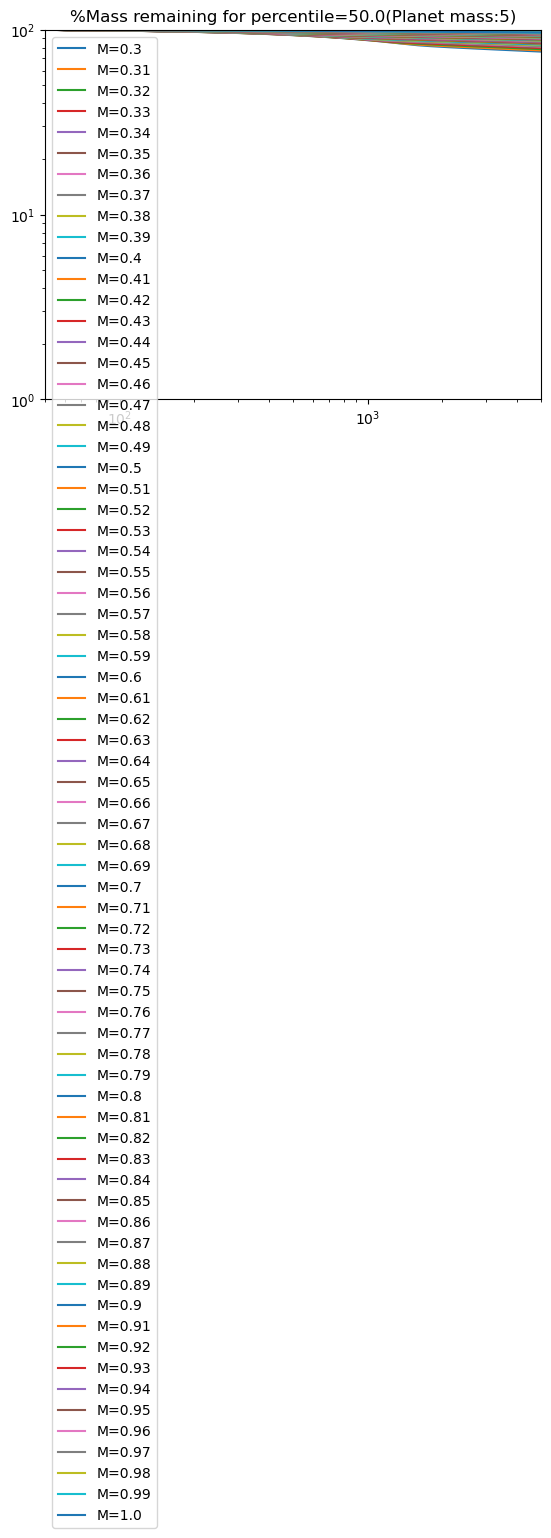

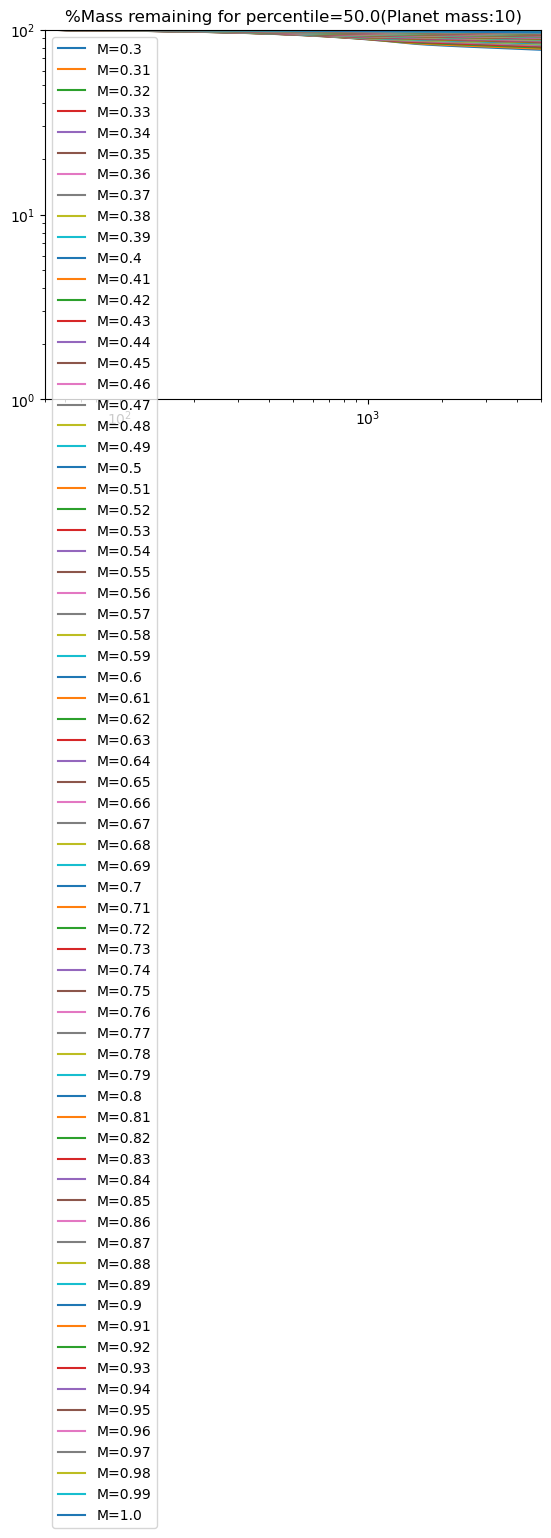

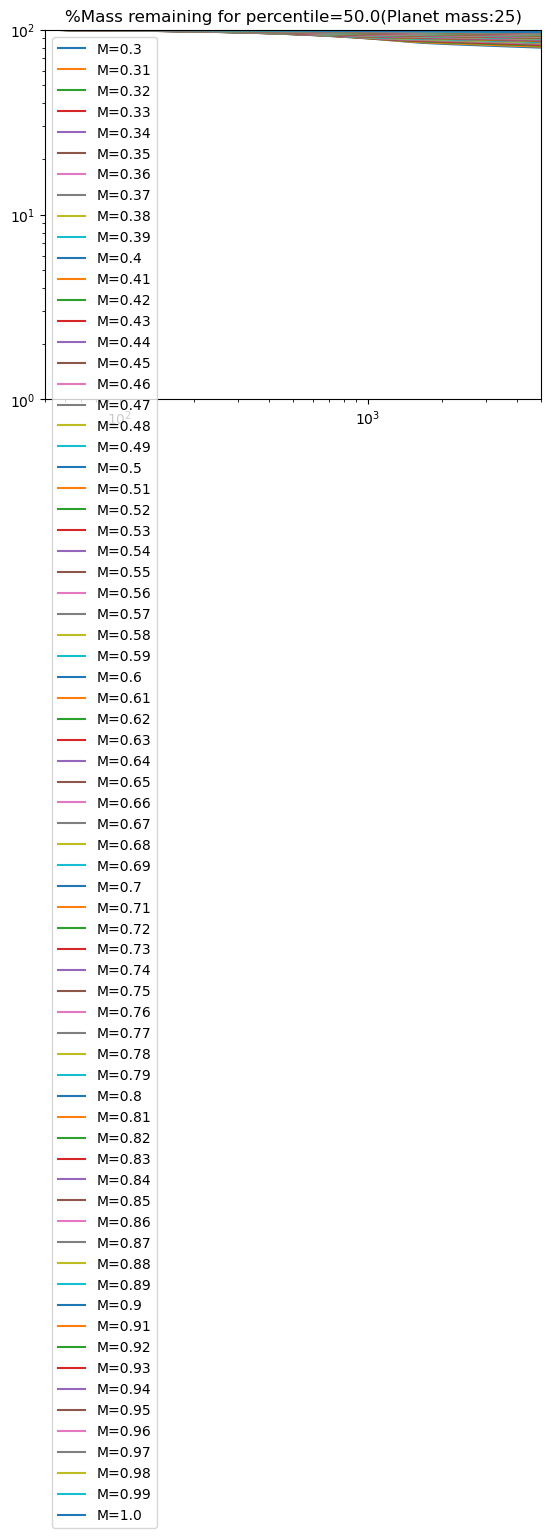

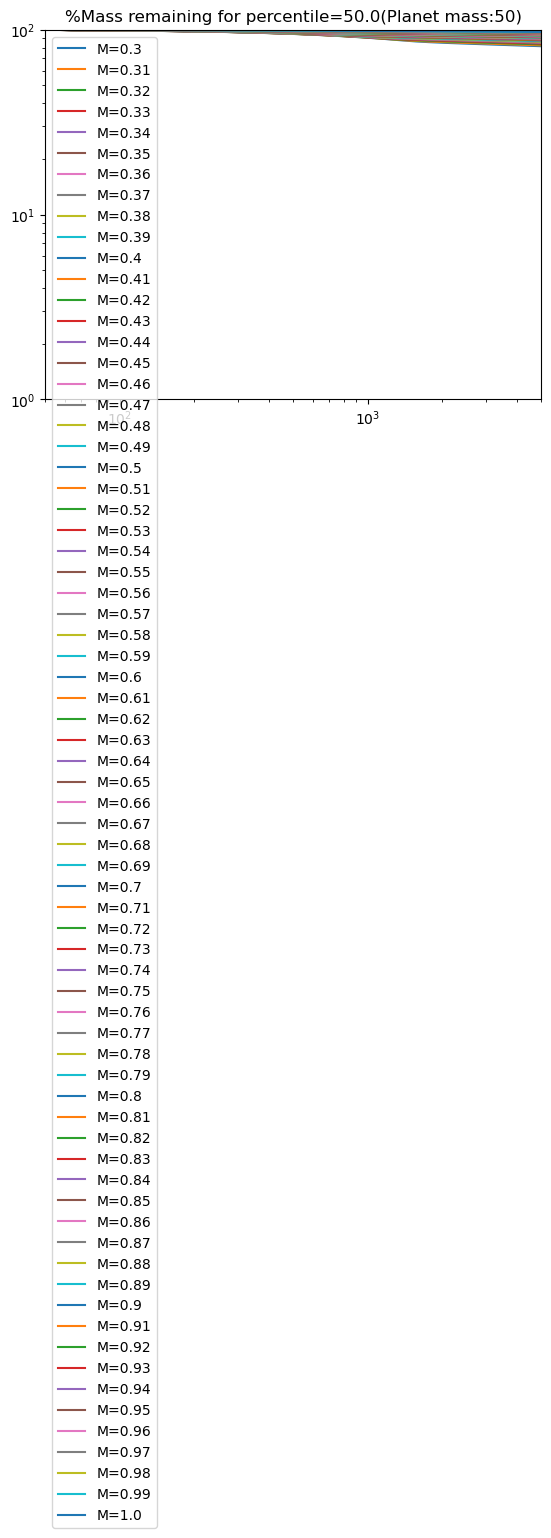

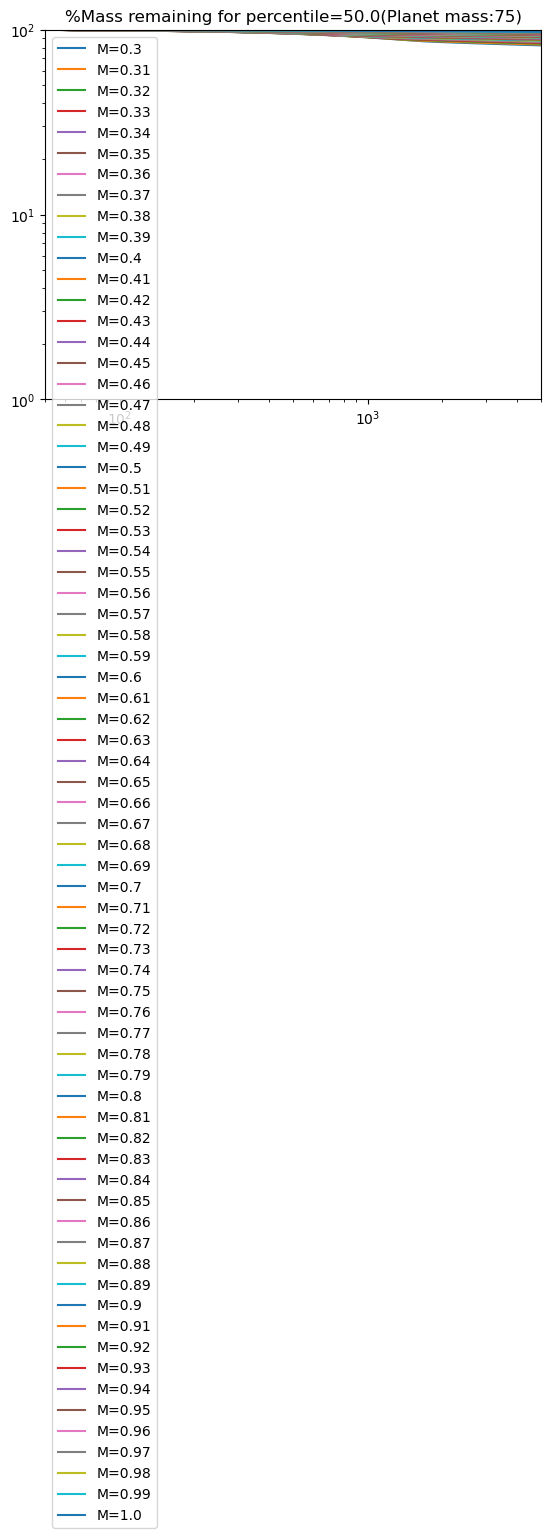

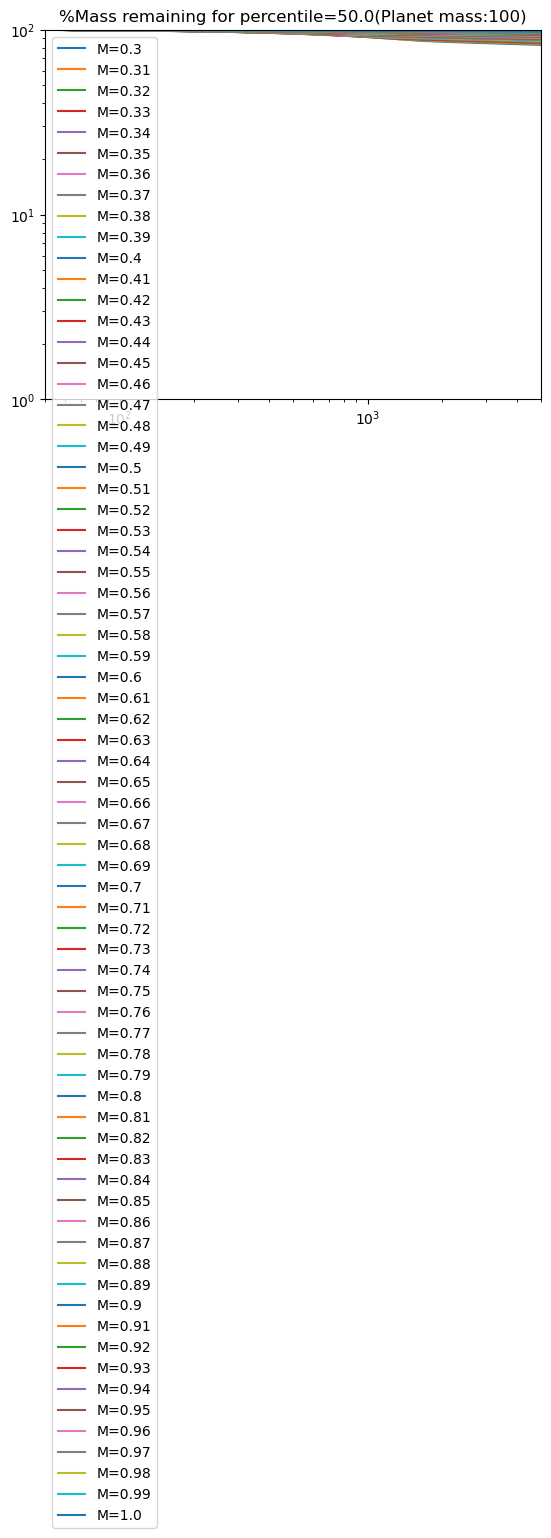

In [4]:
for (m,r) in zip(big_masses,gas_radii):
    fun.plotByMass(ages, stars50, efficiency=0.3, Mpl=m, Rpl=r, chz=chz, R_atm=1, M_atm=5E-3,plotLxAndLeuv=False, plotMassRem=True, plotLxTrack=False, plotLeuvTrack=False, sepByMass=False)
    

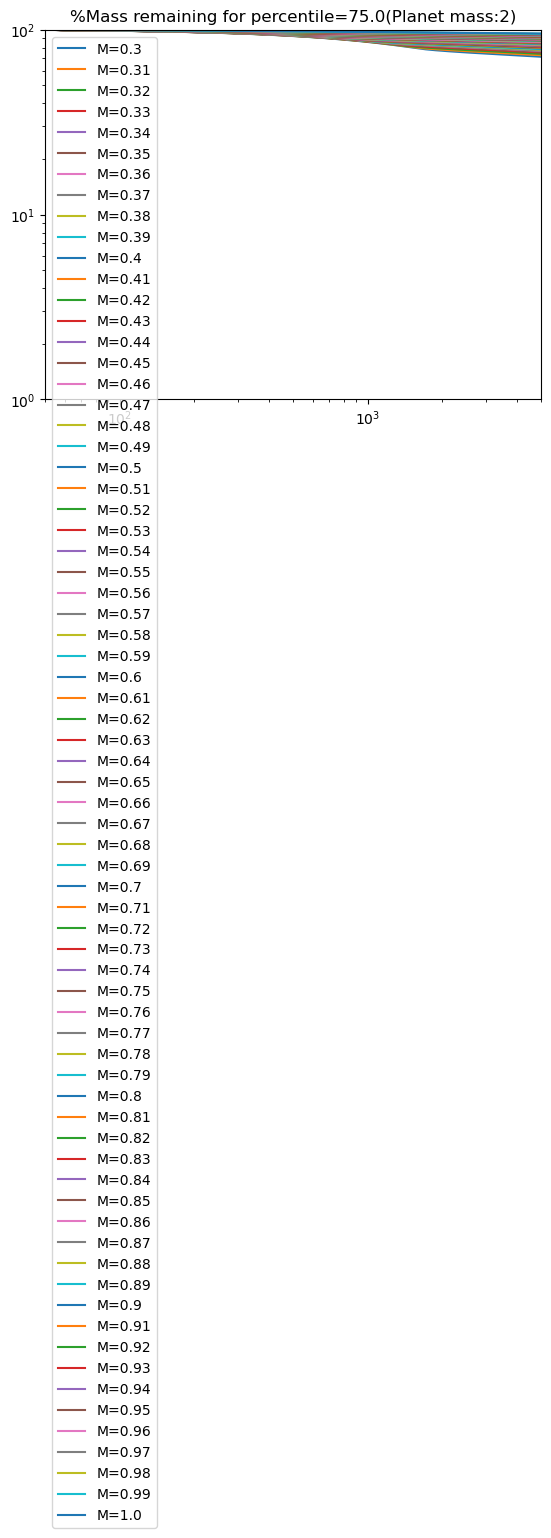

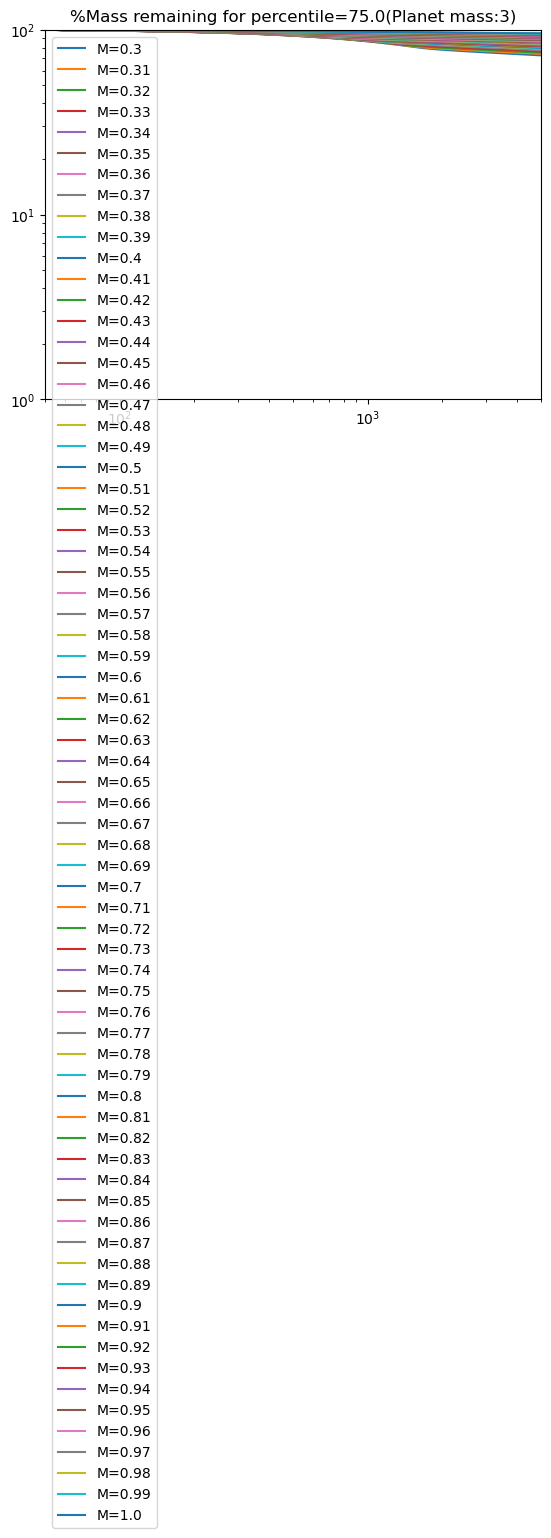

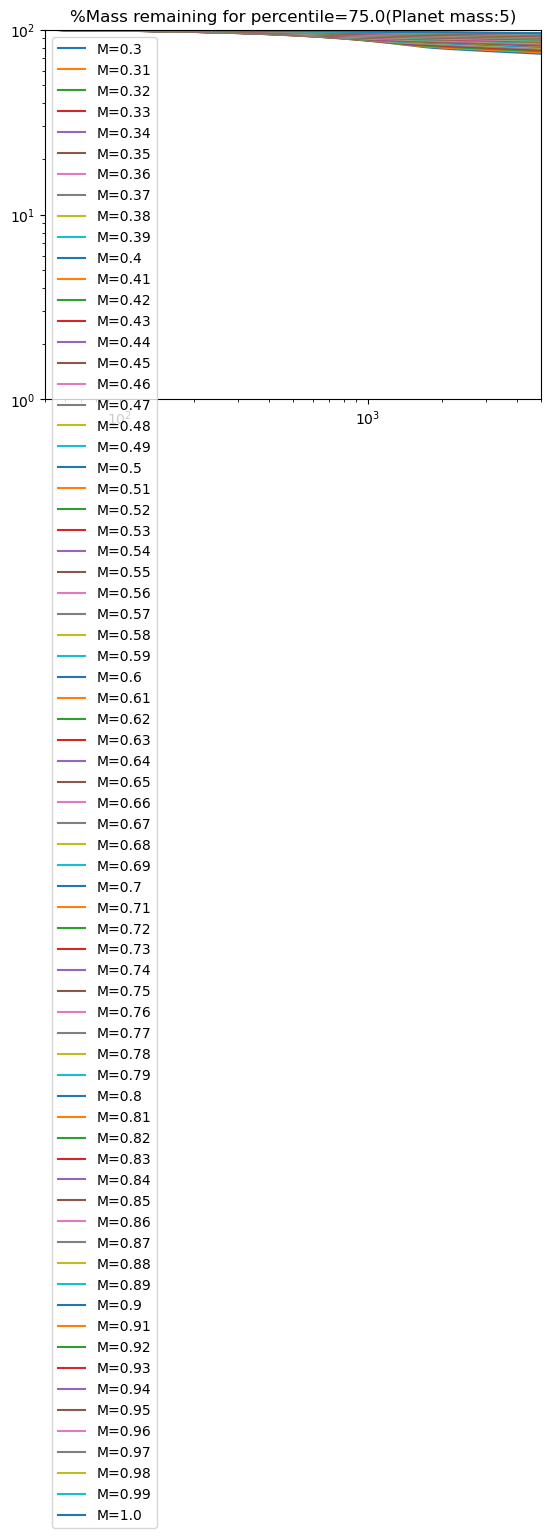

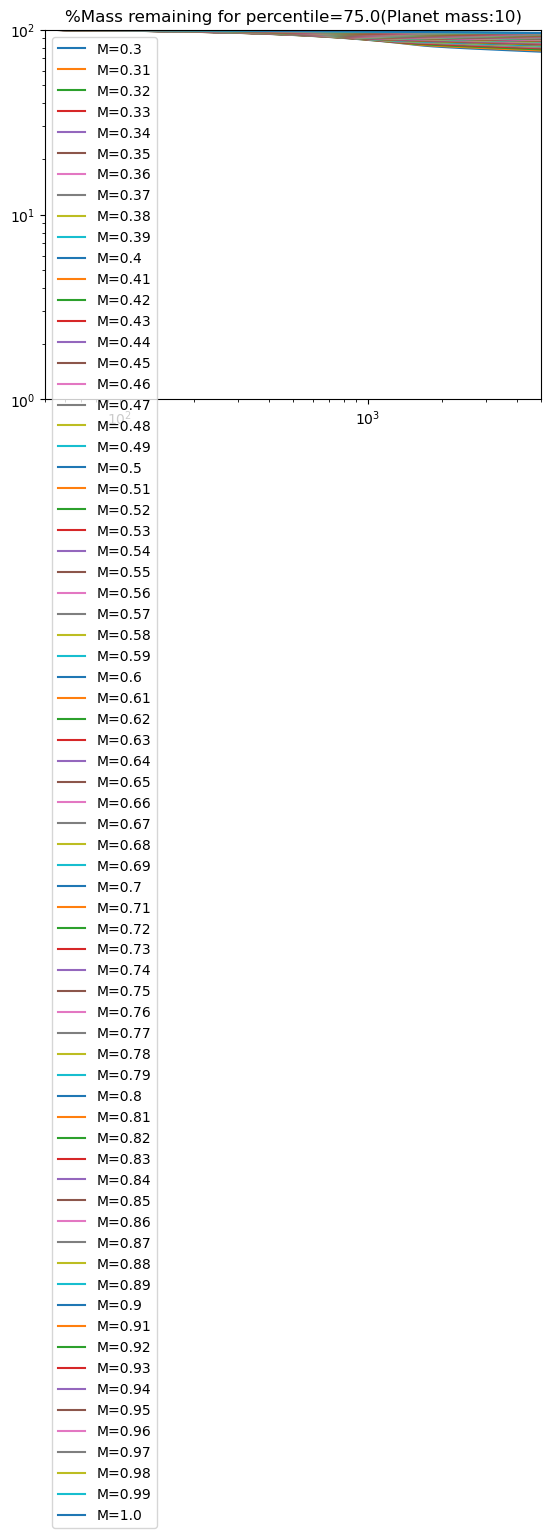

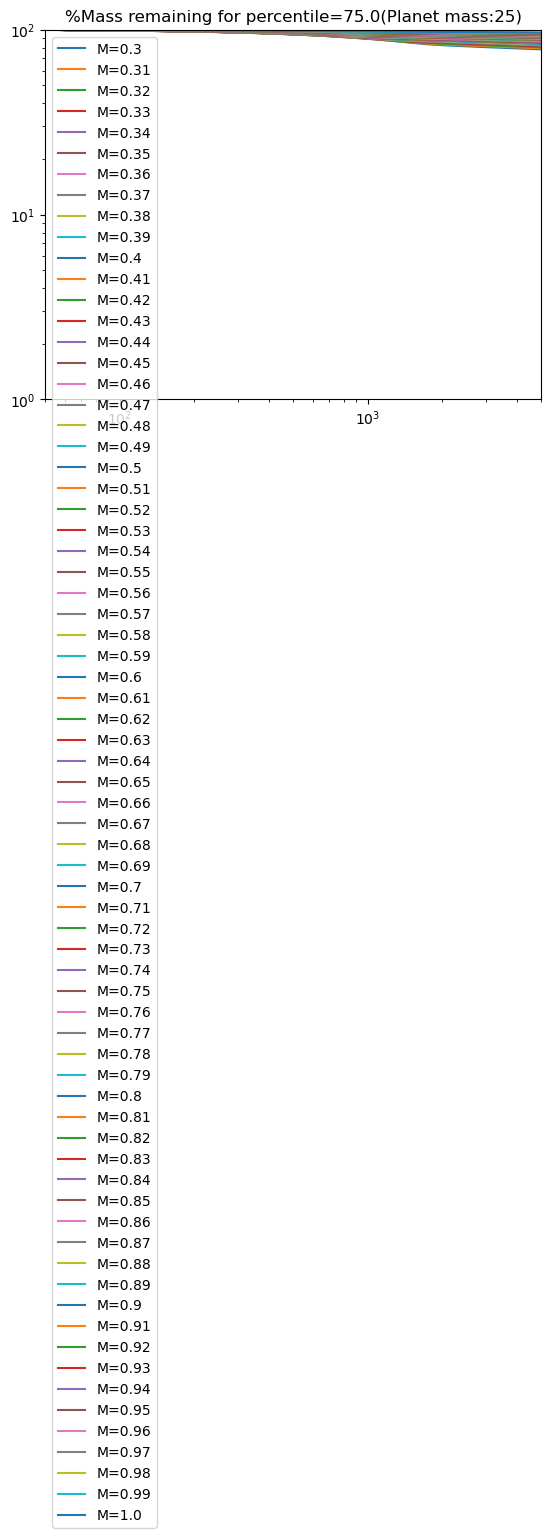

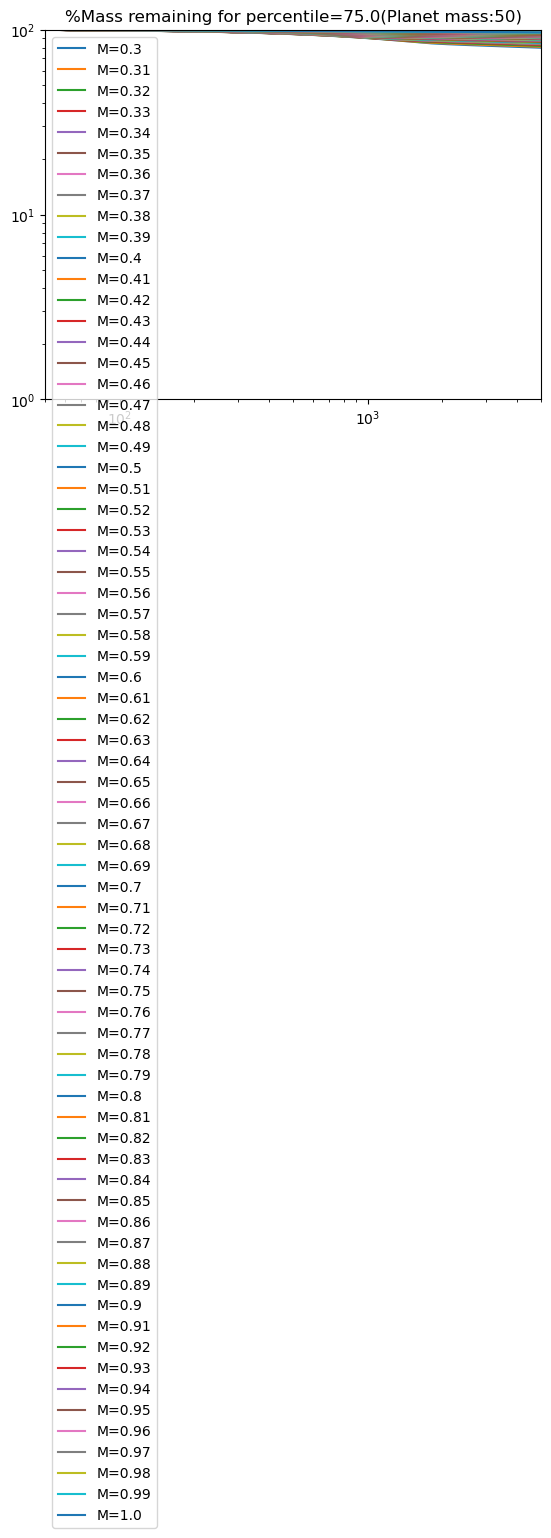

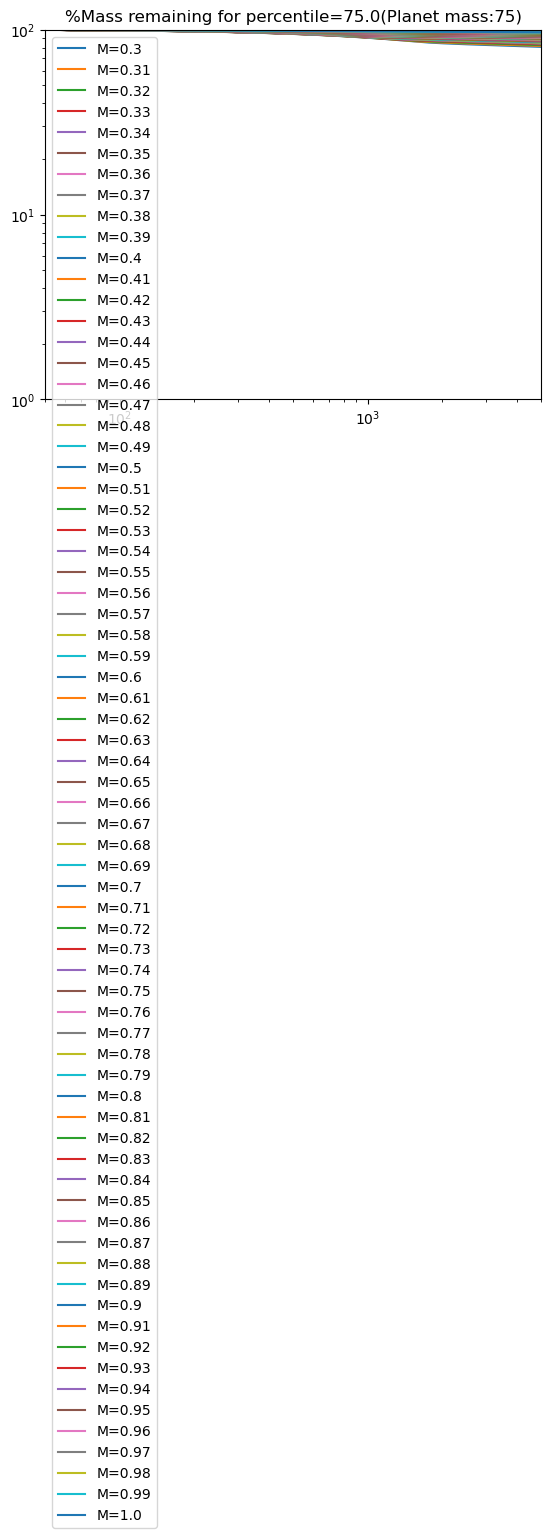

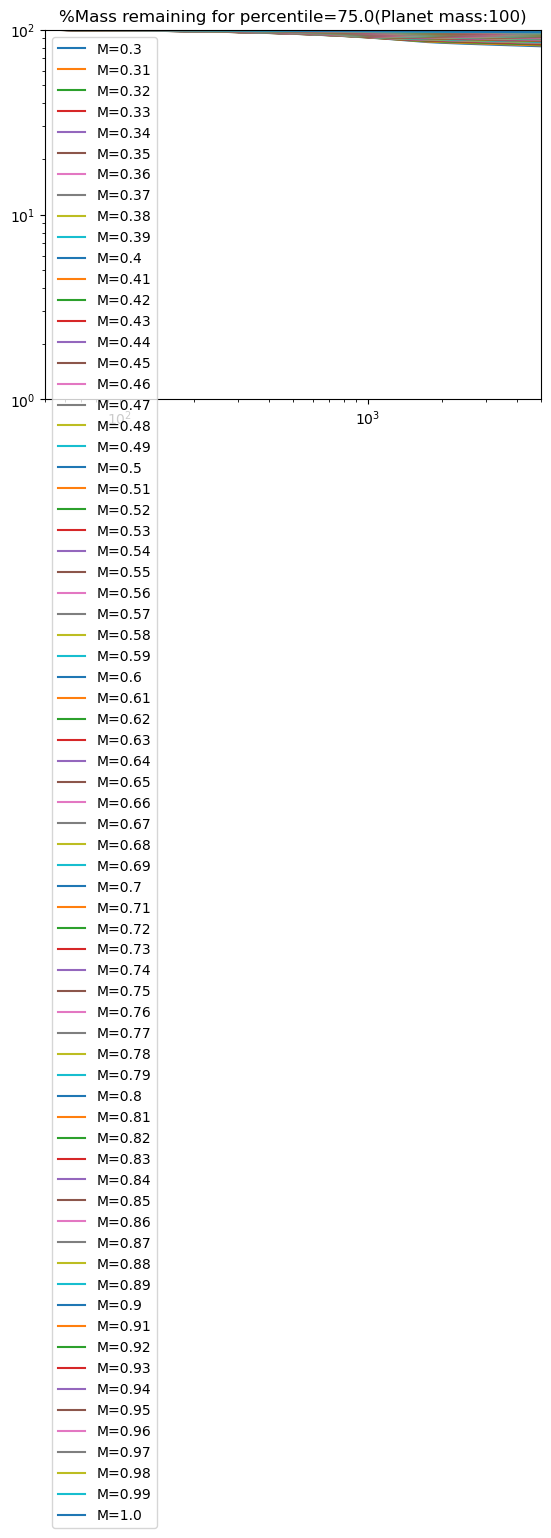

In [5]:
for (m,r) in zip(big_masses,gas_radii):
    fun.plotByMass(ages, stars75, efficiency=0.3, Mpl=m, Rpl=r, chz=chz, R_atm=1, M_atm=5E-3,plotLxAndLeuv=False, plotMassRem=True, plotLxTrack=False, plotLeuvTrack=False, sepByMass=False)
    

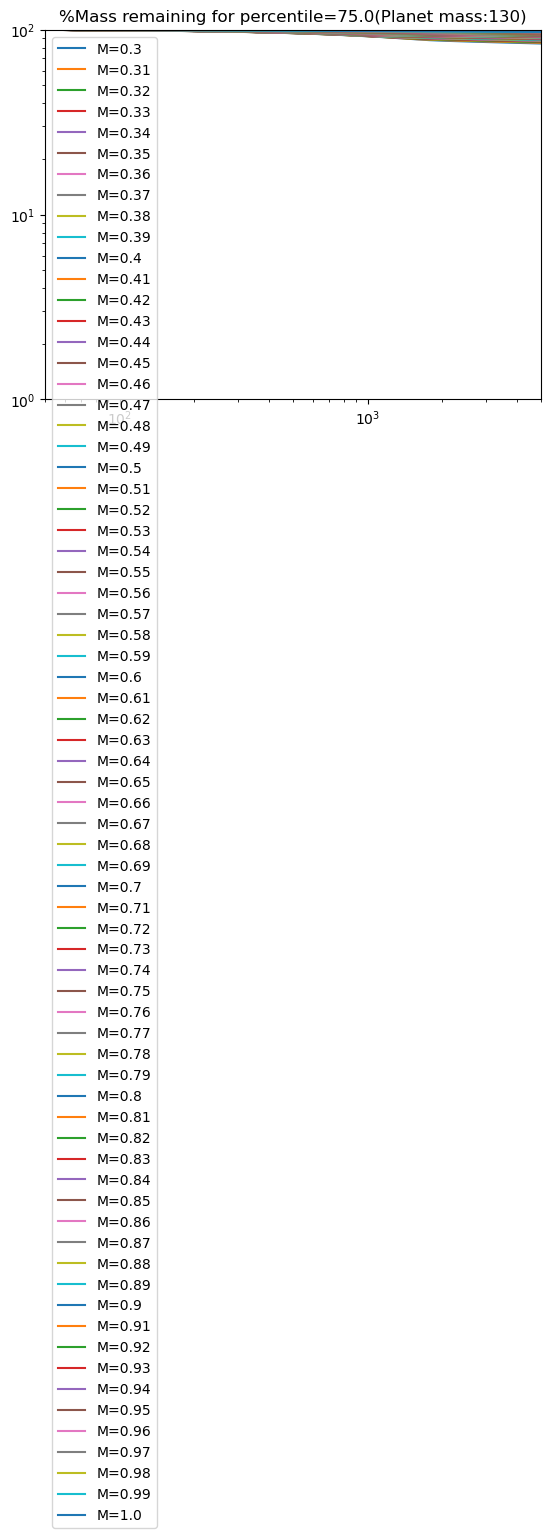

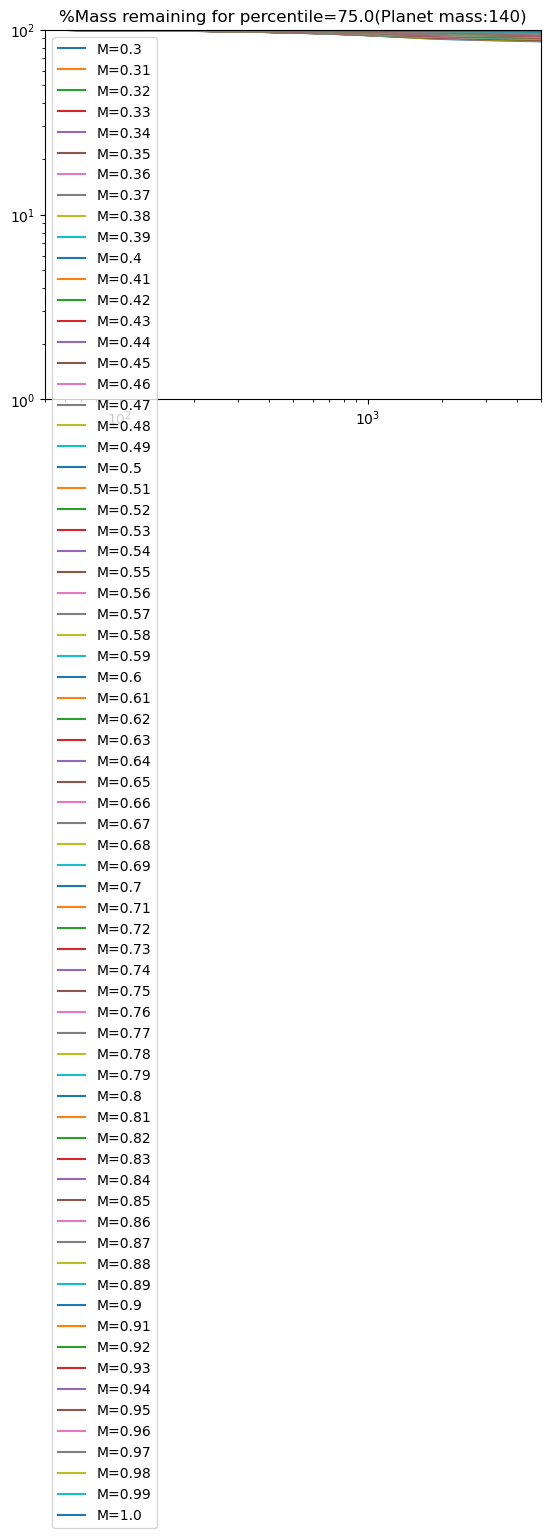

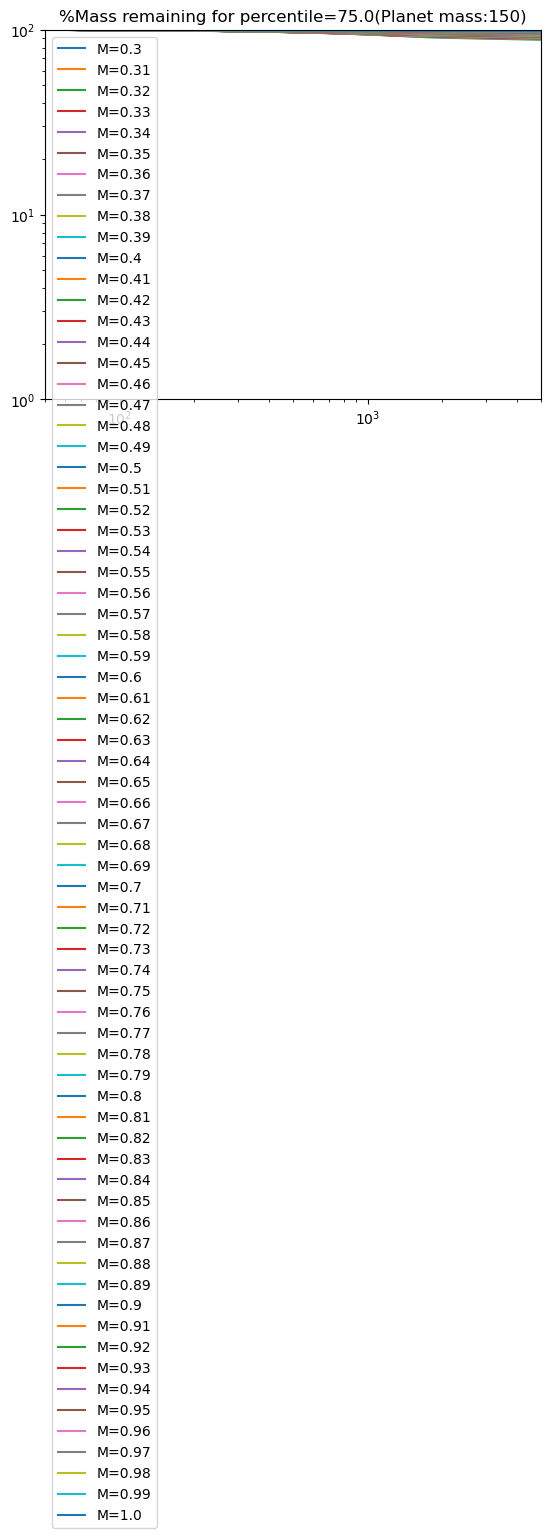

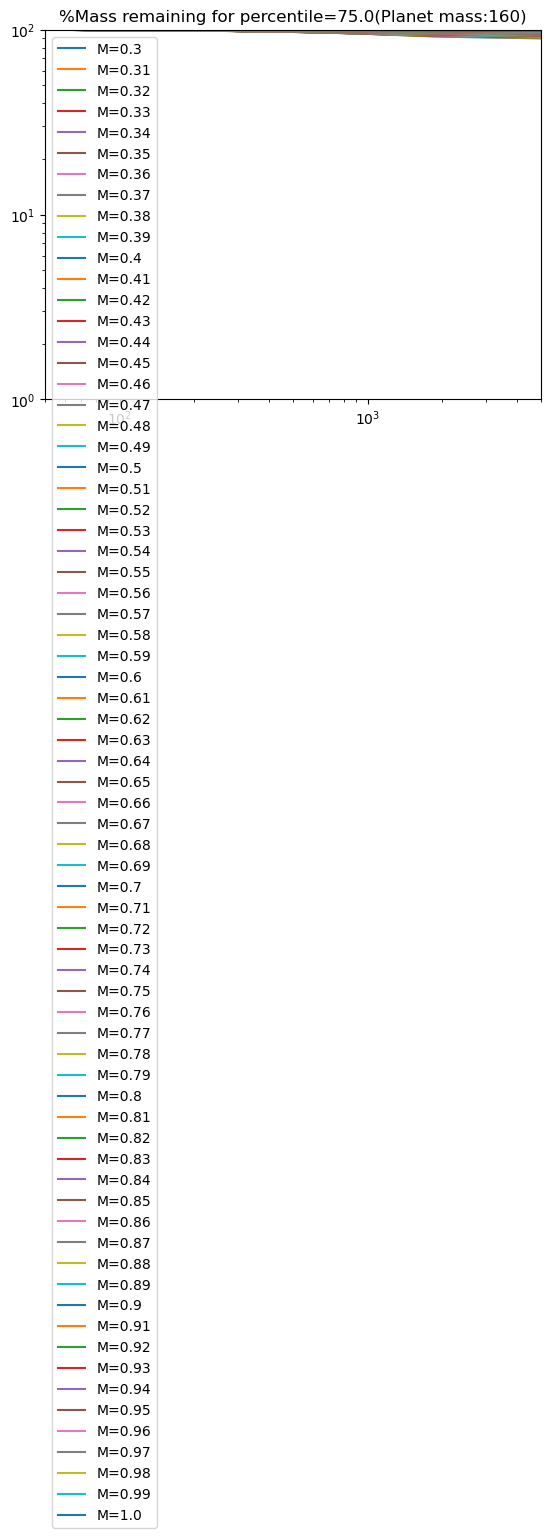

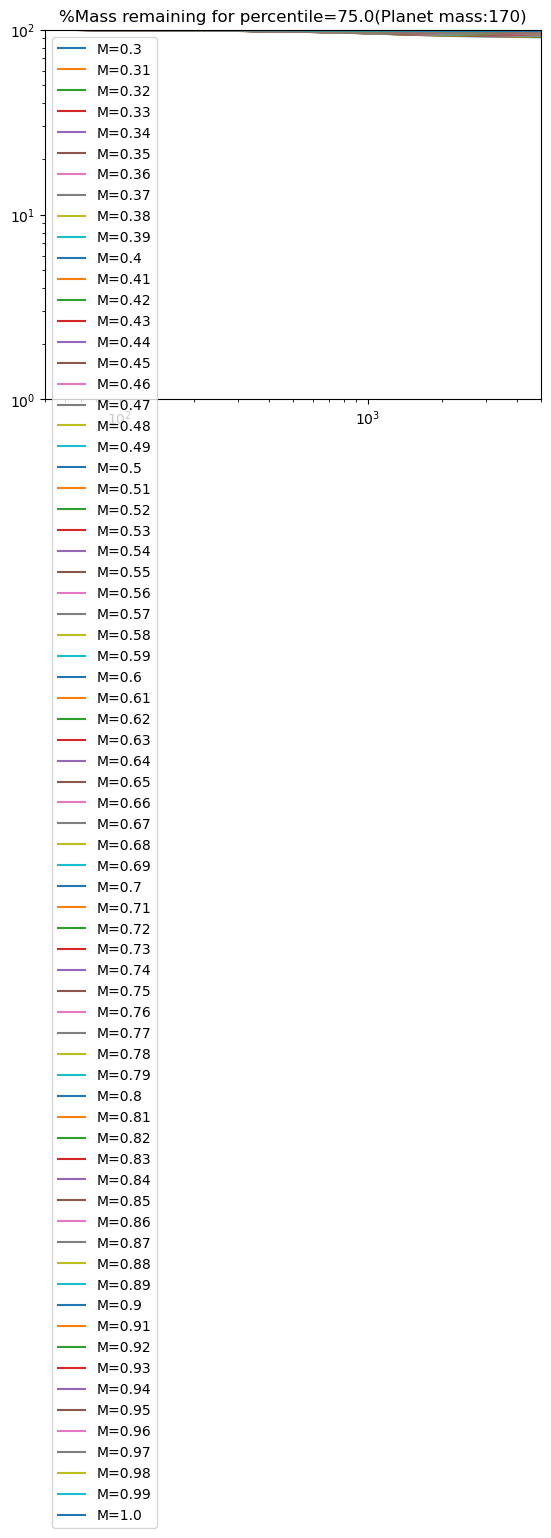

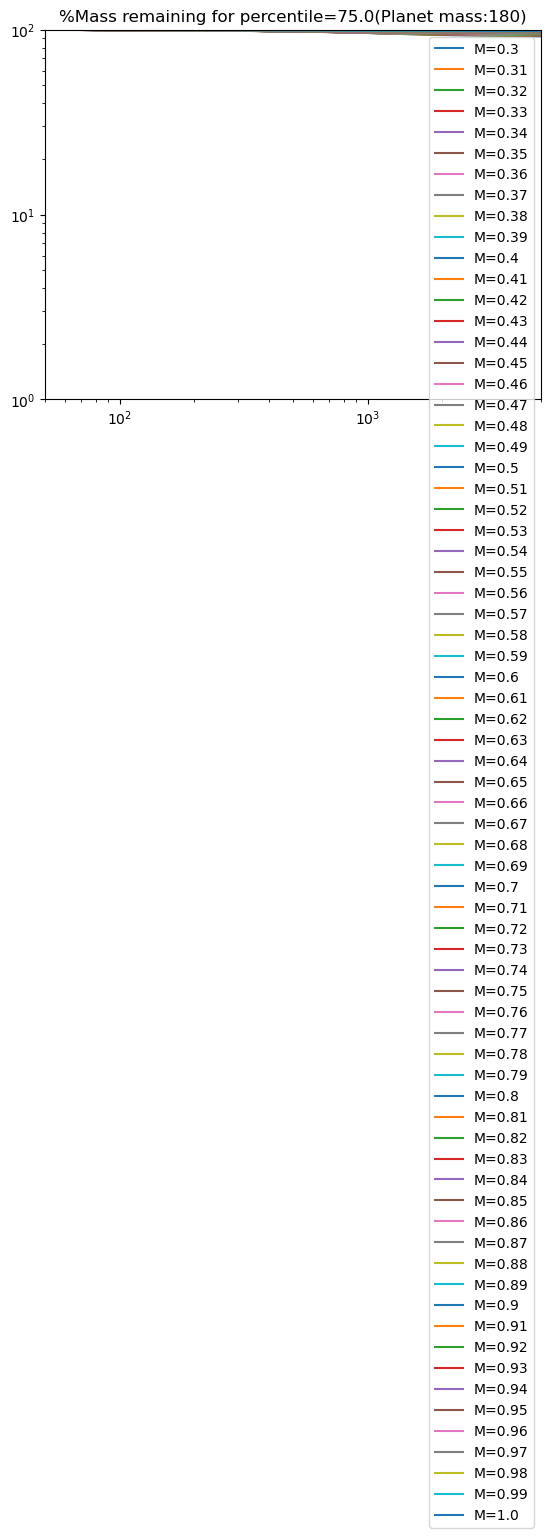

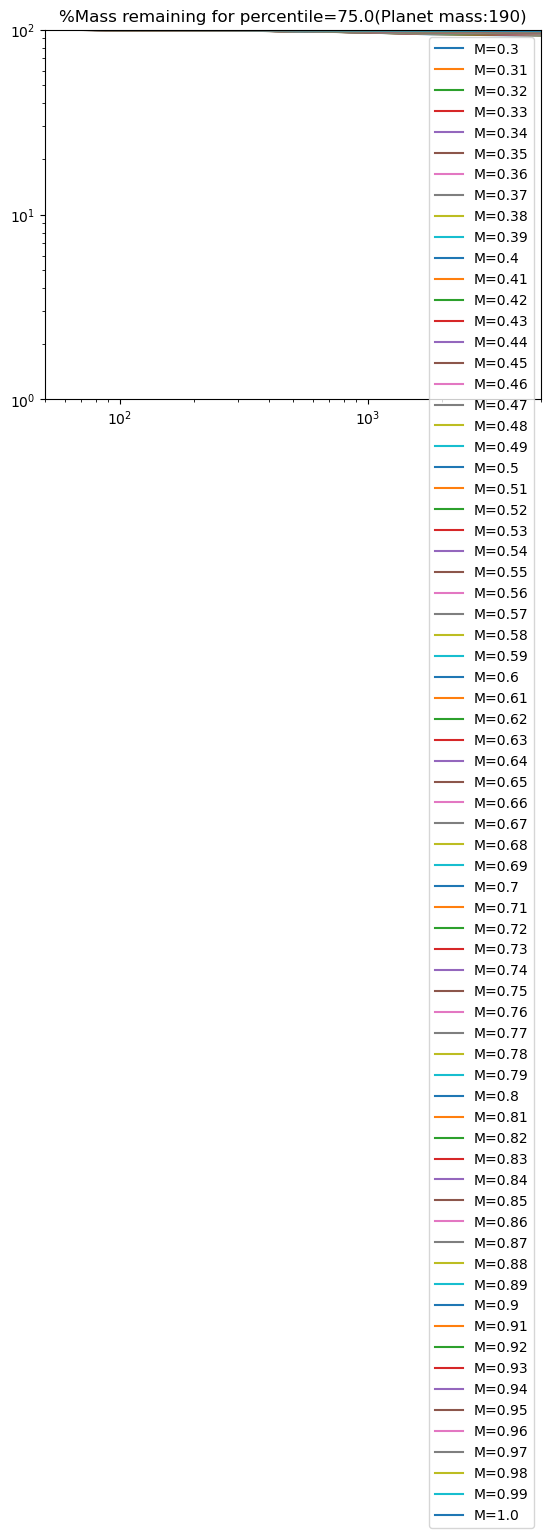

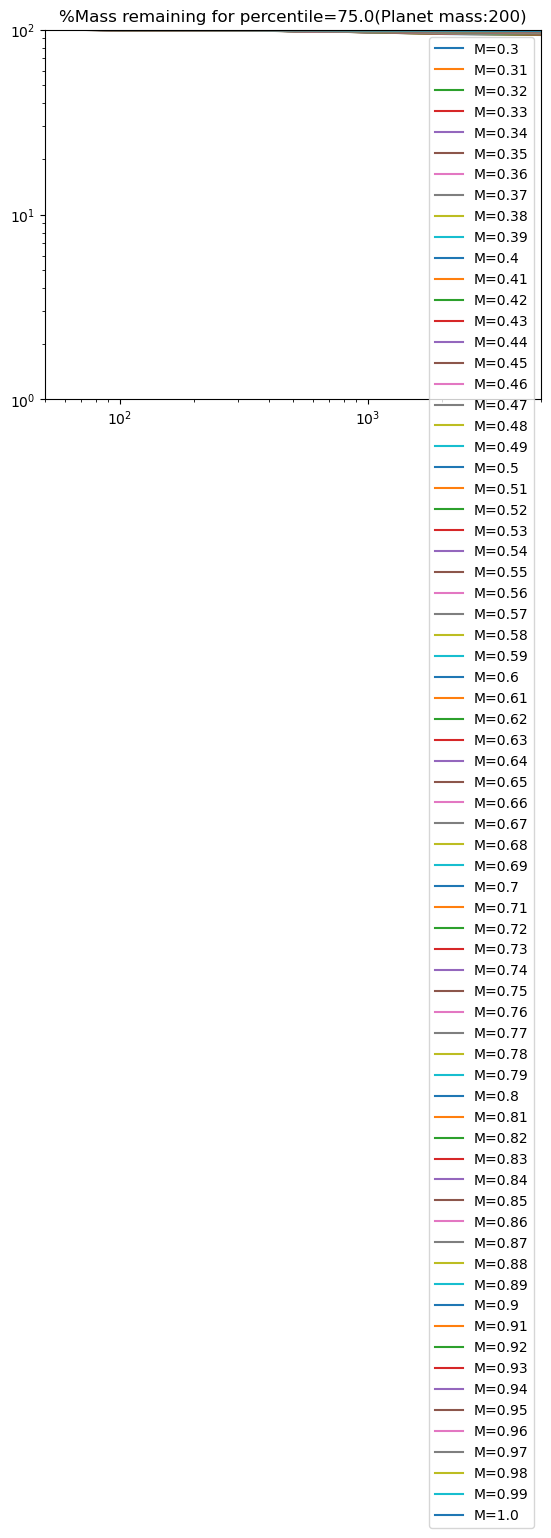

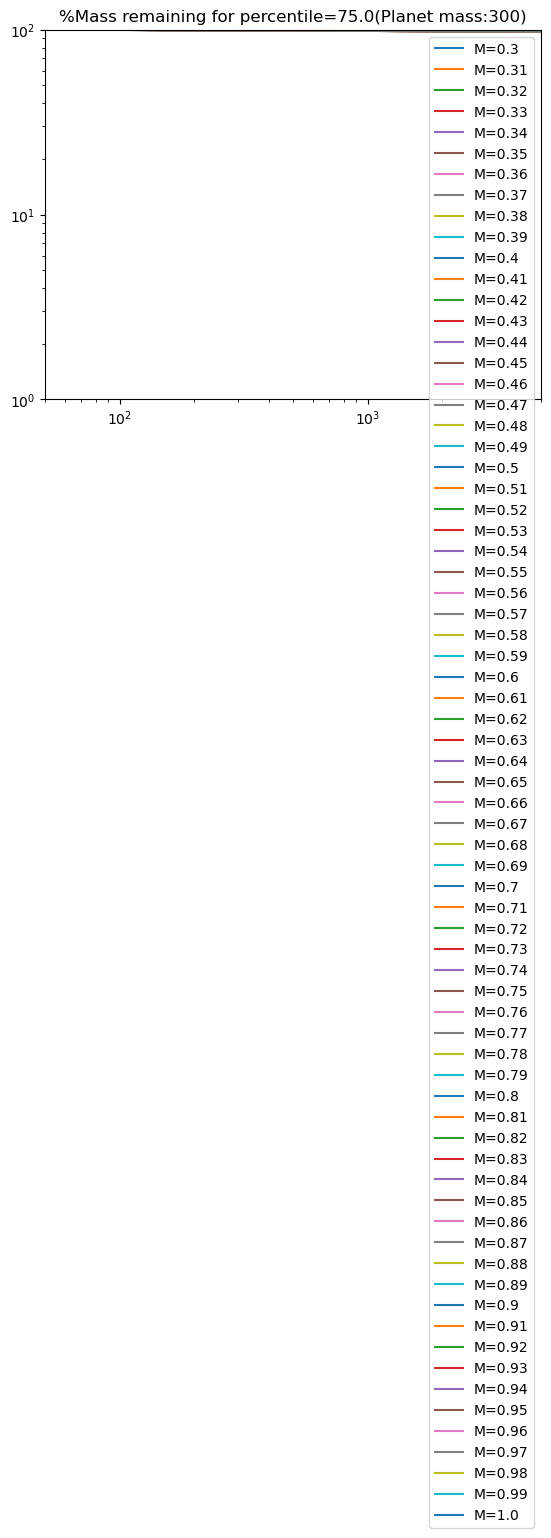

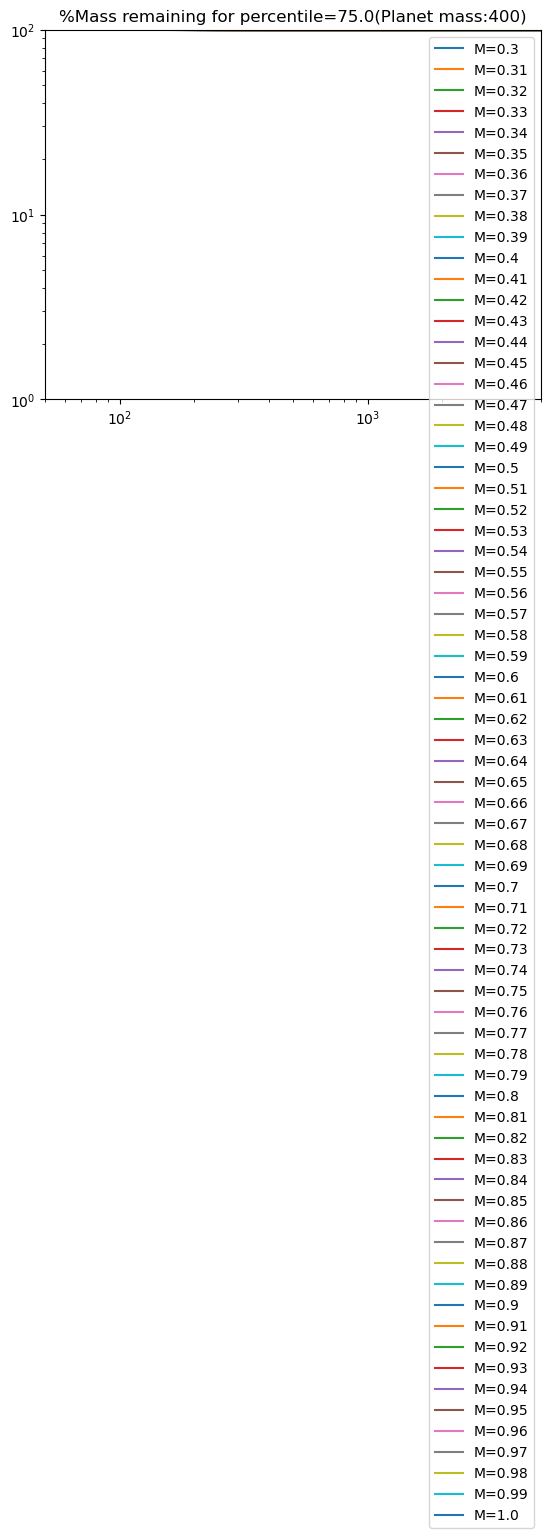

In [6]:
for (m,r) in zip(giant_masses,giant_radii):
    fun.plotByMass(ages, stars75, efficiency=0.3, Mpl=m, Rpl=r, chz=chz, R_atm=1, M_atm=5E-3,plotLxAndLeuv=False, plotMassRem=True, plotLxTrack=False, plotLeuvTrack=False, sepByMass=False)
    